# Used Car Price Prediction

### Load Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
cars_df = pd.read_csv( "new_used_car.csv" )

In [3]:
cars_df.head(5)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,age,make,model,mileage_new,engine_new,power_new,KM_Driven
0,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50,9,honda,jazz,18.20,1199.0,88.70,46
1,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00,8,maruti,ertiga,20.77,1248.0,88.76,87
2,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,3.50,7,nissan,micra,23.08,1461.0,63.10,86
3,Tata Indica Vista Quadrajet LS,Chennai,2012,65932,Diesel,Manual,Second,22.3 kmpl,1248 CC,74 bhp,5.0,1.95,8,tata,indica,22.30,1248.0,74.00,65
4,Maruti Swift VDI BSIV,Jaipur,2015,64424,Diesel,Manual,First,25.2 kmpl,1248 CC,74 bhp,5.0,5.60,5,maruti,swift,25.20,1248.0,74.00,64


In [4]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3092 entries, 0 to 3091
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               3092 non-null   object 
 1   Location           3092 non-null   object 
 2   Year               3092 non-null   int64  
 3   Kilometers_Driven  3092 non-null   int64  
 4   Fuel_Type          3092 non-null   object 
 5   Transmission       3092 non-null   object 
 6   Owner_Type         3092 non-null   object 
 7   Mileage            3092 non-null   object 
 8   Engine             3092 non-null   object 
 9   Power              3092 non-null   object 
 10  Seats              3091 non-null   float64
 11  Price              3092 non-null   float64
 12  age                3092 non-null   int64  
 13  make               3092 non-null   object 
 14  model              3092 non-null   object 
 15  mileage_new        3092 non-null   float64
 16  engine_new         3092 

### Feature Set Selection

In [5]:
cars_df.columns

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'Price', 'age', 'make', 'model', 'mileage_new', 'engine_new',
       'power_new', 'KM_Driven'],
      dtype='object')

In [6]:
x_features = ['KM_Driven', 'Fuel_Type', 'age',
              'Transmission', 'Owner_Type', 'Seats',
              'make', 'mileage_new', 'engine_new', 
              'power_new', 'Location']
## model of the car is not included in the model

In [7]:
cat_features = ['Fuel_Type', 
                'Transmission', 'Owner_Type', 
                'make', 'Location']

In [8]:
num_features = list(set(x_features) - set(cat_features))

In [9]:
num_features

['power_new', 'Seats', 'engine_new', 'mileage_new', 'age', 'KM_Driven']

In [10]:
cars_df[x_features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3092 entries, 0 to 3091
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   KM_Driven     3092 non-null   int64  
 1   Fuel_Type     3092 non-null   object 
 2   age           3092 non-null   int64  
 3   Transmission  3092 non-null   object 
 4   Owner_Type    3092 non-null   object 
 5   Seats         3091 non-null   float64
 6   make          3092 non-null   object 
 7   mileage_new   3092 non-null   float64
 8   engine_new    3092 non-null   float64
 9   power_new     3092 non-null   float64
 10  Location      3092 non-null   object 
dtypes: float64(4), int64(2), object(5)
memory usage: 265.8+ KB


### Dropping Null Values

In [11]:
cars_df = cars_df[x_features + ['Price']].dropna()

In [12]:
cars_df.shape

(3091, 12)

In [13]:
cars_df.sample(5)

,KM_Driven,Fuel_Type,age,Transmission,Owner_Type,Seats,make,mileage_new,engine_new,power_new,Location,Price
199,52,Petrol,7,Manual,First,5.0,honda,13.00,1493.0,100.0,Mumbai,4.35
1449,98,Diesel,3,Manual,First,5.0,tata,22.95,1248.0,74.0,Hyderabad,6.00
1529,58,Petrol,12,Automatic,Second,5.0,hyundai,19.20,1197.0,80.0,Bangalore,2.95
828,53,Petrol,7,Manual,First,5.0,honda,19.40,1198.0,86.8,Jaipur,3.50
1153,39,Petrol,3,Manual,First,5.0,ford,18.16,1196.0,86.8,Coimbatore,4.95


### Encode Categorical Variables

In [14]:
encoded_cars_df = pd.get_dummies(cars_df[x_features], 
                                 columns=cat_features)

In [15]:
encoded_cars_df.sample(5)

,KM_Driven,age,Seats,mileage_new,engine_new,power_new,Fuel_Type_Diesel,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual,...,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune
2280,80,4,5.0,25.0,1396.0,69.00,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
1211,51,7,5.0,21.9,1396.0,88.76,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
601,54,6,5.0,20.0,1399.0,68.05,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1052,40,6,5.0,26.0,1498.0,98.60,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1107,4,2,5.0,21.4,1197.0,83.10,0,1,1,0,...,0,0,0,0,0,1,0,0,0,0


In [16]:
encoded_cars_df.columns

Index(['KM_Driven', 'age', 'Seats', 'mileage_new', 'engine_new', 'power_new',
       'Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Transmission_Automatic',
       'Transmission_Manual', 'Owner_Type_First', 'Owner_Type_Fourth & Above',
       'Owner_Type_Second', 'Owner_Type_Third', 'make_ambassador',
       'make_chevrolet', 'make_datsun', 'make_fiat', 'make_ford', 'make_honda',
       'make_hyundai', 'make_mahindra', 'make_maruti', 'make_mitsubishi',
       'make_nissan', 'make_renault', 'make_skoda', 'make_tata', 'make_toyota',
       'make_volkswagen', 'Location_Ahmedabad', 'Location_Bangalore',
       'Location_Chennai', 'Location_Coimbatore', 'Location_Delhi',
       'Location_Hyderabad', 'Location_Jaipur', 'Location_Kochi',
       'Location_Kolkata', 'Location_Mumbai', 'Location_Pune'],
      dtype='object')

In [17]:
encoded_cars_df.shape

(3091, 41)

### Setting X and y variables

In [18]:
X = encoded_cars_df
y = cars_df['Price']

### Data Splitting

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    train_size = 0.8,
                                                    random_state = 80)

In [21]:
X_train.shape

(2472, 41)

In [22]:
X_train[0:10]

,KM_Driven,age,Seats,mileage_new,engine_new,power_new,Fuel_Type_Diesel,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual,...,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune
1458,81,6,5.0,20.14,1498.0,88.80,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
3079,70,10,5.0,17.24,1198.0,73.90,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
2276,75,5,5.0,20.36,1197.0,78.90,0,1,0,1,...,0,0,0,0,0,0,0,0,1,0
1599,95,22,5.0,17.30,993.0,60.00,0,1,0,1,...,0,0,0,0,0,1,0,0,0,0
2356,14,3,5.0,18.60,1197.0,81.83,0,1,0,1,...,0,0,0,0,0,0,1,0,0,0
737,12,4,5.0,21.40,1197.0,83.10,0,1,0,1,...,0,0,0,0,0,0,0,0,1,0
265,50,5,5.0,20.14,1498.0,88.80,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
713,59,13,4.0,16.10,796.0,37.00,0,1,0,1,...,0,0,0,0,0,1,0,0,0,0
82,88,8,5.0,25.44,936.0,57.60,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
2918,27,3,5.0,22.74,796.0,47.30,0,1,0,1,...,0,0,0,0,0,0,1,0,0,0


In [23]:
X_test.shape

(619, 41)

### Linear Models

Assumes linear relationship between features and outcome variable.

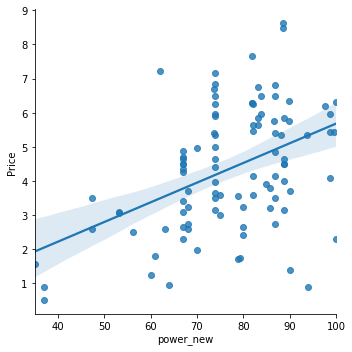

In [24]:
sn.lmplot( data = cars_df.sample(100),
           x = 'power_new',
           y = 'Price');

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
lreg_v1 = LinearRegression()

In [27]:
lreg_v1.fit(X_train, y_train)

LinearRegression()

### Understanding model parameters

In [28]:
lreg_v1.intercept_

1.4783586370934283

In [29]:
lreg_v1.coef_

array([-1.07853404e-02, -3.37985934e-01,  1.78720075e-01, -2.58427582e-02,
        1.10238776e-03,  4.87346624e-02,  4.98706460e-01, -4.98706460e-01,
        1.24616170e-01, -1.24616170e-01,  1.49308129e-01, -4.90098225e-01,
       -7.77031464e-03,  3.48560411e-01,  5.55111512e-16, -6.83214880e-01,
       -8.76927299e-01, -6.39601731e-01, -2.19154130e-02, -5.50663285e-03,
        2.08252171e-01, -6.69597200e-01,  7.21161790e-01,  1.34236609e+00,
       -5.30110523e-02,  1.53609202e-01,  7.16164188e-02, -8.21739633e-01,
        1.09745419e+00,  1.77053987e-01, -6.66871587e-02,  4.18193570e-01,
        9.05247375e-02,  8.41385660e-01, -4.90270994e-01,  4.45717644e-01,
       -8.96446394e-02,  2.67312488e-01, -1.07632886e+00, -2.44020442e-01,
       -9.61820072e-02])

In [30]:
dict(zip(X_train.columns, np.round(lreg_v1.coef_, 3)))

{'KM_Driven': -0.011,
 'age': -0.338,
 'Seats': 0.179,
 'mileage_new': -0.026,
 'engine_new': 0.001,
 'power_new': 0.049,
 'Fuel_Type_Diesel': 0.499,
 'Fuel_Type_Petrol': -0.499,
 'Transmission_Automatic': 0.125,
 'Transmission_Manual': -0.125,
 'Owner_Type_First': 0.149,
 'Owner_Type_Fourth & Above': -0.49,
 'Owner_Type_Second': -0.008,
 'Owner_Type_Third': 0.349,
 'make_ambassador': 0.0,
 'make_chevrolet': -0.683,
 'make_datsun': -0.877,
 'make_fiat': -0.64,
 'make_ford': -0.022,
 'make_honda': -0.006,
 'make_hyundai': 0.208,
 'make_mahindra': -0.67,
 'make_maruti': 0.721,
 'make_mitsubishi': 1.342,
 'make_nissan': -0.053,
 'make_renault': 0.154,
 'make_skoda': 0.072,
 'make_tata': -0.822,
 'make_toyota': 1.097,
 'make_volkswagen': 0.177,
 'Location_Ahmedabad': -0.067,
 'Location_Bangalore': 0.418,
 'Location_Chennai': 0.091,
 'Location_Coimbatore': 0.841,
 'Location_Delhi': -0.49,
 'Location_Hyderabad': 0.446,
 'Location_Jaipur': -0.09,
 'Location_Kochi': 0.267,
 'Location_Kolkata':

### Predict on test set

In [31]:
y_pred = lreg_v1.predict(X_test)

In [32]:
y_df = pd.DataFrame({"actual": y_test,
                     "predicted": y_pred,
                     "residual": y_pred - y_test})

In [33]:
y_df.sample(10, random_state = 100)

,actual,predicted,residual
770,7.23,6.140664,-1.089336
1540,6.43,5.415075,-1.014925
2962,6.25,5.943072,-0.306928
2040,4.69,5.413010,0.723010
640,2.65,2.718570,0.068570
81,8.35,6.461777,-1.888223
2773,6.75,5.823398,-0.926602
816,3.00,4.078071,1.078071
305,1.96,1.310881,-0.649119
2907,4.00,4.425293,0.425293


### Measuring Accuracy

In [34]:
from sklearn.metrics import mean_squared_error, r2_score

In [35]:
mse_v1 = mean_squared_error(y_test, y_pred)

In [36]:
mse_v1

0.975649589495428

In [37]:
rmse_v1 = np.sqrt(mse_v1)

In [38]:
rmse_v1

0.9877497605646017

In [39]:
r2_score(y_test, y_pred)

0.7855629243476527

### What are the reasons for the remaining error

1. More factors 
2. More samples 
3. Complex Models : Try other models
4. Feature Engineering - Derive new features (factors) from existing features (factors)
5. Noise (randomness)
   

### Saving the model

In [45]:
class CarPredictionModel():
    
    def __init__(self, model, features, rmse):
        self.model = model
        self.features = features
        self.rmse = rmse

In [46]:
my_model = CarPredictionModel(lreg_v1, list(X_train.columns), rmse_v1)

In [47]:
# Uncomment this code for older version of sklearn
#from sklearn.externals import joblib
#joblib.dump(my_model, './cars.pkl')

In [48]:
from joblib import dump

In [49]:
dump(my_model, './cars.pkl')

['./cars.pkl']

### Participant Tasks

1. Removing all cars prior to 2006
2. Add the car model to the input variables.
3. Build a new model
4. Predict on test set and measure the accuracy (RMSE and R Squared values)
5. Do the cross Validation and find the mean and std of the r2 values